# Thực hành trên bộ dữ liệu Covid 19

Mô tả bài toán
Để hiểu diễn biến covid 19 tại các quốc gia, WHO tiến hành thống kê số lượng ca bệnh tại từng quốc gia theo ngày. Các thông tin được ghi nhận bao gồm, bộ dữ liệu chứa thông tin thống kê của ngày 12-4-2020 với các thông tin như sau:

- country: Quốc gia 
- continent: Châu lục
- date: ngày ghi nhận
- cases: Số lượng ca mắc trong ngày
- deaths: số lượng ca tư vong tính tới thời điểm thống kê
- country_code: Mã quộc gia
- population: Dân số

## Import các thư viện cần thiết

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Đọc dữ liệu và hiển thị 10 dòng đầu tiên

In [27]:
data = pd.read_csv('/content/drive/MyDrive/PhanTichDuLieu_CodeGym/subset-covid-data.csv')
data.head(10)

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
5,Anguilla,America,2020-04-12,12,4,2020,0,0,NaN,NaN
6,Antigua_and_Barbuda,America,2020-04-12,12,4,2020,0,0,ATG,96286.0
7,Argentina,America,2020-04-12,12,4,2020,162,7,ARG,44494502.0
8,Armenia,Europe,2020-04-12,12,4,2020,30,2,ARM,2951776.0
9,Aruba,America,2020-04-12,12,4,2020,6,0,ABW,105845.0


## Tìm hiểu cấu trúc bộ dữ liệu

In [28]:
data.info() # Bộ dữ liệu chứa 26 dòng và 10 cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [29]:
data.describe() # Dòng này cho ra số lượng, giá trị trung bình, trung vị, giá trị nhỏ nhất, lớn nhất, giá trị ở các vị trí 25, 50, 75%

,day,month,year,cases,deaths,population
count,206.000000,206.000000,206.0,206.000000,206.000000,2.020000e+02
mean,12.024272,3.985437,2020.0,395.247573,29.713592,3.731716e+07
std,0.424141,0.209020,0.0,2160.176439,159.533131,1.413776e+08
min,11.000000,1.000000,2020.0,0.000000,0.000000,1.000000e+03
25%,12.000000,4.000000,2020.0,0.000000,0.000000,1.278222e+06
50%,12.000000,4.000000,2020.0,11.500000,0.000000,7.042862e+06
75%,12.000000,4.000000,2020.0,88.750000,3.000000,2.600084e+07
max,18.000000,4.000000,2020.0,28391.000000,1831.000000,1.392730e+09


In [30]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

2020-04-12    204
2020-04-11      1
2020-01-18      1
Name: date, dtype: int64

In [31]:
# lọc dữ liệu nhiễu:
cleaned_data = data[data.date == '2020-04-12']

In [32]:
cleaned_data # Đã lọc 2 giá trị ngày 2020-01-18 và 2020-04-11

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


trung bình số ca mắc mới: 376.8186274509804
trung vị của số ca mắc mới: 11.5


Text(0, 0.5, 'Số lượng quốc gia')

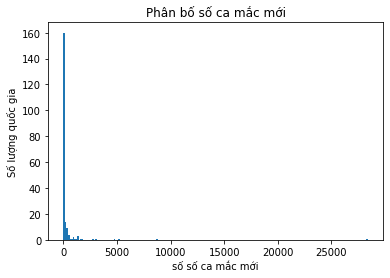

In [33]:
# Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia --> Truye xuất vào case
print ("trung bình số ca mắc mới: " + str(cleaned_data.cases.mean()))
print ("trung vị của số ca mắc mới: "+ str(cleaned_data.cases.median()))
print("=======================================")
plt.hist(cleaned_data.cases, bins = 200)
plt.title("Phân bố số ca mắc mới")
plt.xlabel("số số ca mắc mới")
plt.ylabel("Số lượng quốc gia")

* có 50% quốc gia có số ca mắc mới <=11 ca, và có 50% quốc gia có số ca mắc mới >12 ca, nhưng giá trị trung bình = 376 lớn hơn rất nhiều so với 11.5 nên có một vài quốc gia có số ca mắc mới vô lớn, khác biệt hoàn toàn với các quốc gia còn lại
* Nhìn vào biểu đồ phân bố: Hầu như tất cả các quốc gia (khoảng 160/206) có số lượng ca mắc mới rất nhỏ, còn lại một số quốc gia có số ca mắc mới lớn hơn hẳn, đặc biệt có quốc gia có số ca mắc mới > 25000

## Tổng số ca mắc mới và tử vong ở các châu lục

In [34]:
print("tổng số ca nhiễm và số ca ncủa các châu lục")
cleaned_data.groupby('continent')['cases','deaths'].sum()

tổng số ca nhiễm và số ca ncủa các châu lục


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


## Top 5 quốc gia có ca mắc cao nhất

In [35]:
print ("5 quốc gia có số ca nhiễm mới cao nhất")
data = data.sort_values('cases',ascending = False)
data.head(5)

5 quốc gia có số ca nhiễm mới cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


## Top 5 quốc gia có ca tử vong cao nhất

In [37]:
print ("5 quốc gia có số ca tử vong cao nhất")
data = data.sort_values('deaths',ascending = False)
data.head(5)

5 quốc gia có số ca tử vong cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
